
# Objetivo: Aprender a aplicar regresión lineal para predecir el número de bicicletas alquiladas en un día.
===================================================
#1. Introducción
===================================================

Pregunta: ¿Qué tipo de problemas se pueden resolver con regresión lineal?

Escribe tu respuesta aquí en un comentario.

RTA: La regresión lineal se usa para resolver problemas donde se desea predecir un valor numérico continuo a partir de una o más variables. Es útil cuando existe una relación lineal entre los datos. Por ejemplo, se aplica para estimar el precio de una casa según su tamaño, predecir ventas futuras, calcular el ingreso esperado de una persona o pronosticar la temperatura en función del tiempo.

#2. Carga de Dataset

In [ ]:
#Importa el/los módulo(s) pandas as pd para usarlos en el análisis.
import pandas as pd
# Obtiene el dataset de url externa
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
# Lee un archivo CSV y lo carga en un DataFrame de Pandas.
bike_data = pd.read_csv("daily-bike-share.csv")

--2025-10-11 01:35:22--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: ‘daily-bike-share.csv’

daily-bike-share.cs 100%[===================>]  47.66K  --.-KB/s    in 0.04s   

2025-10-11 01:35:23 (1.23 MB/s) - ‘daily-bike-share.csv’ saved [48800/48800]



In [ ]:
# Muestra las primeras 5 filas del dataset
bike_data.head()
# Muestra información general del dataset
bike_data.info()
# Genera una tabla con la descripción de cada campo y su significado

# Pregunta: ¿Qué variable queremos predecir?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [ ]:
# Extrae el día del mes desde la columna de fechas
bike_data['day'] = pd.to_datetime(bike_data['dteday']).dt.day

# Muestra las primeras 25 filas del dataset
bike_data.head(25)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,6
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,7
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,8
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,9
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,10


#3. Preparación de datos

In [ ]:
# Definir las características numéricas relevantes del dataset
feature_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
                'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
X = bike_data[feature_cols]
# Seleccionar la variable objetivo (label)
y = bike_data['rentals']

# Mostrar estadísticas descriptivas de las variables numéricas y el objetivo

bike_data[feature_cols + ['rentals']].describe()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000


#4.Gráfica de datos

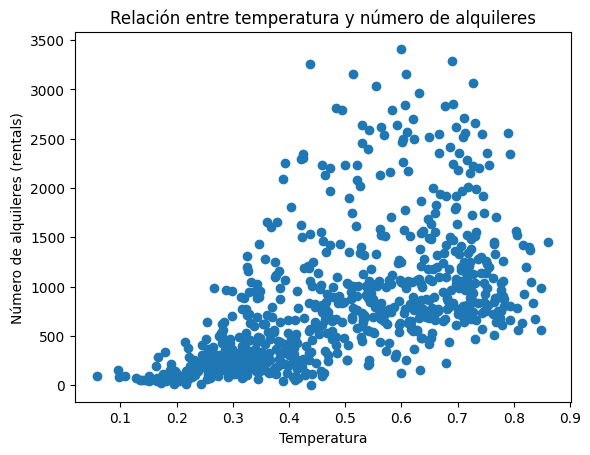

In [ ]:
# TODO: Grafica una dispersión de temperatura vs rentals
import matplotlib.pyplot as plt

plt.scatter(bike_data['temp'], bike_data['rentals'])
plt.xlabel('Temperatura')
plt.ylabel('Número de alquileres (rentals)')
plt.title('Relación entre temperatura y número de alquileres')
plt.show()

# Pregunta: ¿Se observa alguna relación lineal?

# Si, se logra ver un incremento en a medida que va aumentando la temperatura y el de alquileres

# 4. División en conjuntos de entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split


X = bike_data[['temp', 'hum', 'windspeed']]
y = bike_data['rentals']


# Divide los datos en entrenamiento (70%) y prueba con test_size (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Mostrar cuántas filas tiene cada conjunto

print("Filas en entrenamiento:", X_train.shape[0])
print("Filas en prueba:", X_test.shape[0])

# Pregunta: ¿Qué pasa si usamos un test_size demasiado pequeño?

#Al no tener tanto margen no representa bien los datos reales

Filas en entrenamiento: 511
Filas en prueba: 220


# 5. Entrenamiento del modelo

In [ ]:
from sklearn.linear_model import LinearRegression


# TODO: Crea y entrena el modelo
model = LinearRegression()
model.fit(X_train, y_train)


# Muestra los coeficientes βn
print("Coeficientes:", model.coef_)
print("Intercepto (β0):", model.intercept_)

# Muestra información del modelo entrenado

print("\nEcuación del modelo:")
print(f"rentals = {model.intercept_:.2f} + "
      f"{model.coef_[0]:.2f} * temp + "
      f"{model.coef_[1]:.2f} * hum + "
      f"{model.coef_[2]:.2f} * windspeed")

# Pregunta: ¿Cómo interpretas el coeficiente asociado a la temperatura?
# El coeficiente de la temperatura nos dice cuánto cambian los alquileres de bicis cuando sube un grado


Coeficientes: [ 1995.14121649  -609.96851171 -1322.36837651]
Intercepto (β0): 489.15215245428504

Ecuación del modelo:
rentals = 489.15 + 1995.14 * temp + -609.97 * hum + -1322.37 * windspeed


# 6. Evaluación del modelo

MSE: 355453.7139624432


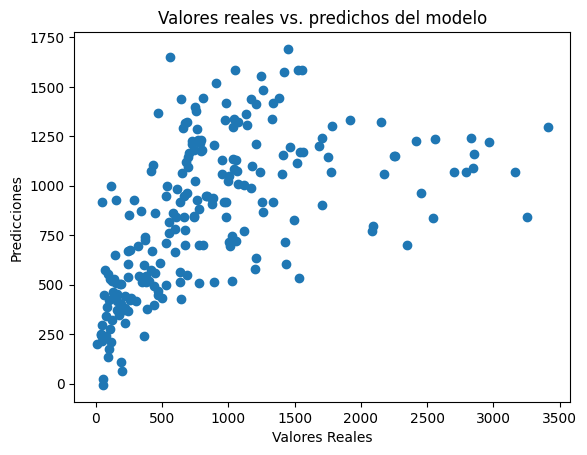

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Genera predicciones
y_pred = model.predict(X_test)


# Calcula métrica MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


# Grafica valores reales vs predichos

plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores reales vs. predichos del modelo")
plt.show()

# Pregunta: ¿Qué información nos da el MSE sobre la calidad del modelo?

#El porcentaje de error entre los valores entre los reales y predicciones como los de la linea de tendencia

# Pregunta: ¿Qué información nos da el RMSE sobre la calidad del modelo?

# Indica el error de promedio en relación al número de alquileres

# 7. Extensión / Retos

In [ ]:
# Entrena un modelo usando solo la variable 'temp'.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Variables
X_temp = bike_data[['temp']]
y = bike_data['rentals']

# División de datos
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo simple
model_temp = LinearRegression()
model_temp.fit(X_train_temp, y_train_temp)

# Predicciones
y_pred_temp = model_temp.predict(X_test_temp)

# Cálculo del MSE
mse_temp = mean_squared_error(y_test_temp, y_pred_temp)
print("MSE modelo con 'temp':", mse_temp)


# Compara los resultados con el modelo multivariable.
print("MSE modelo multivariable:", mse)

# Comparar precisión
if mse_temp < mse:
    print("El modelo con 'temp' es más preciso.")
else:
    print("El modelo multivariable es más preciso.")


# Explicación breve

#El modelo es más preciso porque usa más variables como humedad, viento, etc
#Y mejora la capacidad de explicar el número de alquileres de bicicletas


MSE modelo con 'temp': 240302.26992226945
MSE modelo multivariable: 355453.7139624432
El modelo con 'temp' es más preciso.
